# Synthetic Data Visualization

Visualize the synthetic data generation process. This file is for demonstration purposes only, the data used by `train.py` is in generated in the same file. 

In [4]:
# Import necessary functions
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import numpy.random as random
from utils import *

## Generating Synthetic Data

The training images of two groups are simulated. Each image contains 4 Gaussian distribution density functions. Let the 4 standard deviations be:

|  $\sigma_1$ | $\sigma_2$  |

|  $\sigma_3$ | $\sigma_4$  |

The 4 Gaussians are constructed such that

1. two diagonal Gaussians $\sigma_1,\sigma_4$ are linked to a factor of interest $mf$ (e.g. true effect between two classes)
2. the bottom off-diagonal Gaussians $\sigma_3$ is linked to the confounding factor $cf_1$.

In [5]:

# Generate synthetic training images. The version of generate_data used in train.py is in utils.py 
def generate_data(N, seed=4201):
    
    np.random.seed(seed)
    
    labels = np.zeros((N*2,))
    labels[N:] = 1

    # 2 confounding effects between 2 groups
    cf1 = np.zeros((N*2,))
    cf2 = np.zeros((N*2,))
    cf1[:N] = np.random.uniform(1,4,size=N) 
    cf1[N:] = np.random.uniform(3,6,size=N) 
    cf2[:N] = np.random.uniform(1,4,size=N) 
    cf2[N:] = np.random.uniform(3,6,size=N)

    # 2 major effects between 2 groups
    np.random.seed(seed+1)
    mf = np.zeros((N*2,))
    mf[:N] = np.random.uniform(1,4,size=N) 
    mf[N:] = np.random.uniform(3,6,size=N)
    
    # simulate images
    d = int(32)
    dh = d//2
    x = np.zeros((N*2,d,d,1)) 
    y = np.zeros((N*2,)) 
    y[N:] = 1
    for i in range(N*2):
        x[i,:dh,:dh,0] = gkern(kernlen=d//2, nsig=5)*mf[i]
        x[i,dh:,:dh,0] = gkern(kernlen=d//2, nsig=5)*cf1[i]
        x[i,dh:,dh:,0] = gkern(kernlen=d//2, nsig=5)*mf[i]
        x[i] = x[i] + np.random.normal(0,0.01,size=(d,d,1)) # random noise
        
    return labels, cf1, cf2, mf, x, y

labels, cf1, cf2, mf, x, y = generate_data(1000, seed=1)

## Visualize Synthetic Images

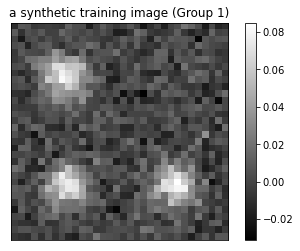

In [6]:
plt.imshow(x[0,:,:,0],cmap='gray')
plt.colorbar()
plt.title("a synthetic training image (Group 1)"); 
plt.xticks(np.arange(0), ())
plt.yticks(np.arange(0), ()) 
plt.savefig('synthetic_sample_group1.jpg', format='jpg', dpi=300)

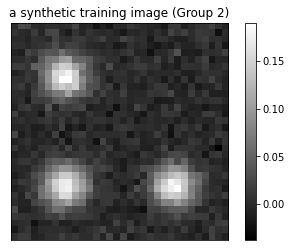

In [7]:
plt.imshow(x[1200,:,:,0],cmap='gray')
plt.colorbar()
plt.title("a synthetic training image (Group 2)"); 
plt.xticks(np.arange(0), ())
plt.yticks(np.arange(0), ()) 
plt.savefig('synthetic_sample_group2.jpg', format='jpg', dpi=300)